## SOM implementation
This file contains code for the SOM method. To execute just follow the flow of the code. Firstly is the dataset 1 loaded and classified, with an output plot produced and then follows the dataset 2. 

In [1]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
with open('../Datasets/A3-dataset1Modified.csv', 'r') as file:
   dataset = pd.read_csv('../Datasets/A3-dataset1Modified.csv', sep=',')

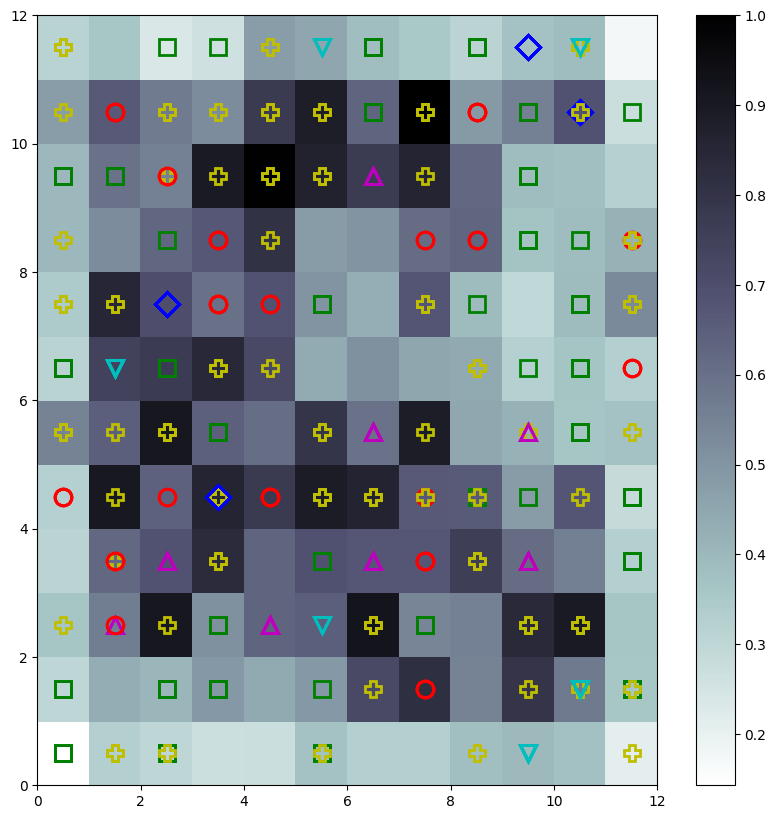

In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# A SOM is a single-layer neural network, x and y are dimensions of the neural layers
# x, y - dimensions of SOM, input_len = number of features in dataset, sigma = radius of neighborhood (1.0 is default), 
som_x = 10
som_y = 10
som_sigma = 0.2
som_lea = 0.5
nr_iter = 15000

gridSize = som_x*som_y

som = MiniSom(x=som_x, y=som_y, input_len=X.shape[1], sigma=som_sigma, learning_rate=som_lea)

som.train_random(X, nr_iter)  # 10000 iterations

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r') 
plt.colorbar()

markers = ['o', 's', 'D', 'v', '^', 'P', '*']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cnt, xx in enumerate(X):
    w = som.winner(xx)  
    plt.plot(w[0] + .5, w[1] + .5, markers[dataset.iloc[cnt, -1]-1], markerfacecolor='None',
             markeredgecolor=colors[dataset.iloc[cnt, -1]-1], markersize=12, markeredgewidth=2)
plt.savefig("Output/Dataset1/Plot" + "|Grid" + str(gridSize) + "|sigma" + str(som_sigma) + "|lea" + str(som_lea) + "|iter" + str(nr_iter) + ".png")
plt.show()

# Each "cell" in the output plot is a neuron
# Color map in background shows distance between neurons, white = low distance, black = high distance

## Dataset 2

In [2]:
with open('../Datasets/A3-dryBeansModified.csv', 'r') as file:
    dataset = pd.read_csv('../Datasets/A3-dryBeansModified.csv', sep=',')

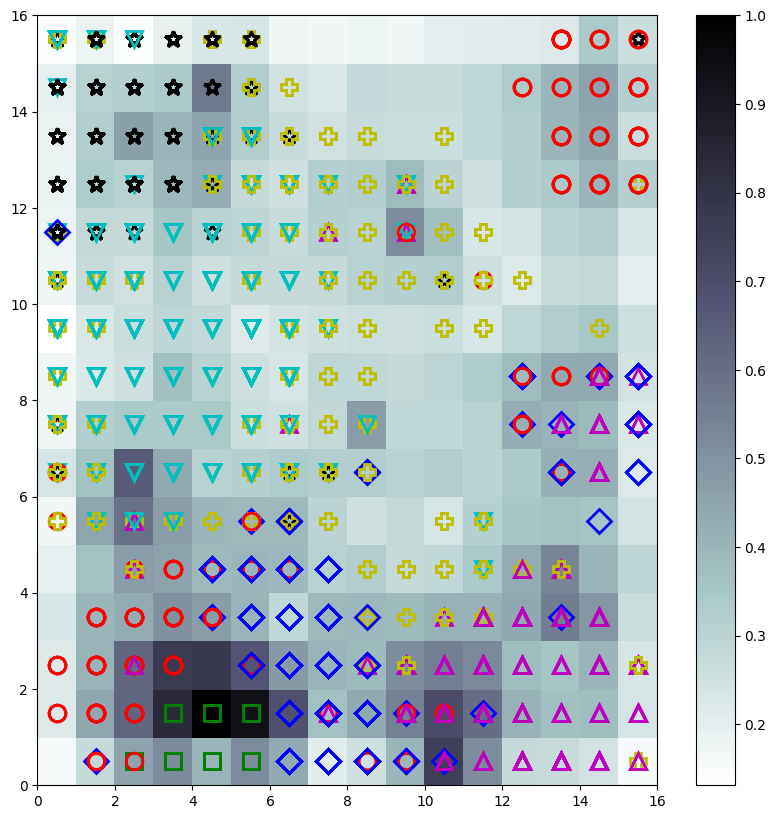

In [30]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# A SOM is a single-layer neural network, x and y are dimensions of the neural layers
# x, y - dimensions of SOM, input_len = number of features in dataset, sigma = radius of neighborhood (1.0 is default), 
som_x = 16
som_y = 16
som_sigma = 0.7
som_lea = 0.2
nr_iter = 20000

gridSize = som_x*som_y

som = MiniSom(x=som_x, y=som_y, input_len=X.shape[1], sigma=som_sigma, learning_rate=som_lea)

som.train_random(X, nr_iter)  # 10000 iterations

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r') 
plt.colorbar()

markers = ['o', 's', 'D', 'v', '^', 'P', '*']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cnt, xx in enumerate(X):
    w = som.winner(xx)  
    plt.plot(w[0] + .5, w[1] + .5, markers[dataset.iloc[cnt, -1]-1], markerfacecolor='None',
             markeredgecolor=colors[dataset.iloc[cnt, -1]-1], markersize=12, markeredgewidth=2)
plt.savefig("Output/Dataset2/Plot" + "|Grid" + str(gridSize) + "|sigma" + str(som_sigma) + "|lea" + str(som_lea) + "|iter" + str(nr_iter) + ".png")
plt.show()
